### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subjects
from neuropy.utils.signal_process import filter_sig
from neuropy import plotting
from neuropy.analyses import Pf1D

### Example ripple trace

In [ ]:
sess = subjects.sd.ratSday3[0]

In [ ]:
# plt.style.use('dark_background')
figure = plotting.Fig()
fig, gs = figure.draw(grid=(3, 1),wspace=0.5)
maze = sess.paradigm['maze'].flatten()
rpls = sess.pbe.time_slice(maze[0],maze[1])
channels = sess.probegroup.get_connected_channels()

rpl_indx = [829] # visually identified with random selection runs
print(rpl_indx)
cmap = 'gist_rainbow'
for i,indx in enumerate(rpl_indx):
    ax = plt.subplot(gs[0])
    rpl = rpls[indx].flatten()
    rpl_sig = sess.eegfile.get_signal(
        channels[8][9], t_start=rpl[0]-0.20, t_stop=rpl[1]+0.2
    )
    plotting.plot_signal_traces(rpl_sig, pad=1,ax=ax,lw=2,color='b')
    ax.set_yticks([])

# figure.savefig(subjects.figpath_sd/'example_ripple')

### Example ripples and replay raster plot below it

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import subjects
from neuropy import plotting
from neuropy.analyses import Pf1D
sess = subjects.nsd.ratVday3[0]

In [ ]:
%matplotlib widget
# plt.style.use('dark_background')
figure = plotting.Fig()
fig, gs = figure.draw(grid=(3, 5),wspace=0.5)
maze = sess.paradigm['maze'].flatten()
rpls = sess.pbe.time_slice(maze[0],maze[1])
channels = sess.probegroup.get_connected_channels()
pyr_neurons = sess.neurons.get_neuron_type('pyr')
pos = sess.lin_maze
# pos.t_start = pos.t_start
run = sess.run['forward']
pf = Pf1D(neurons=pyr_neurons,position=pos,speed_thresh=10,sigma=4,grid_bin=3,frate_thresh=1,epochs=sess.run)
pf_neurons =pyr_neurons.get_by_id(pf.neuron_ids) 

tc = pf.tuning_curves
sort_ind = np.argsort(np.argmax(tc,axis=1))
pf_neurons = pf_neurons[sort_ind]

# rpl_indx = np.random.choice(len(rpls),4,replace=False)
rpl_indx = [356,712,426,829] # visually identified with random selection runs
print(rpl_indx)
cmap = 'gist_rainbow'
for i,indx in enumerate(rpl_indx):
    ax = plt.subplot(gs[0,i+1])
    rpl = rpls[indx].flatten()
    rpl_sig = sess.eegfile.get_signal(
        channels[8].astype(int), t_start=rpl[0]-0.10, t_stop=rpl[1]+0.1
    )
    plotting.plot_signal_traces(rpl_sig, pad=1,ax=ax,lw=0.5,color='k')
    if i>0:
        ax.set_yticks([])

    neurons = pf_neurons.time_slice(rpl[0],rpl[1])
    ax_raster = plt.subplot(gs[1,i+1])
    ax_raster = plotting.plot_raster(neurons,ax=ax_raster,color=cmap,markersize=4)
 
    ax_raster.axis('off')

ax_pf = plt.subplot(gs[1,0])
plotting.plot_ratemap(pf,ax=ax_pf,normalize_tuning_curve=True,cmap=cmap)
ax_pf.set_yticks([])
# figure.savefig(subjects.figpath_sd/'example_ripples_')

### Ripple traces multiple shanks

In [ ]:
import numpy as np
import subjects
import matplotlib.pyplot as plt
from neuropy.plotting import plot_signal_traces

sess = subjects.tn.ratKday3[0]
t1 = 349*60+56+0.9
# t1 = 350*60+0.2
t2 = t1+2
fig,ax = plt.subplots(5,1)
cmaps = ['r','#30f83a','#f830ee','#1eb1f6','#f6ee1e']
for i in range(5):
    channels = sess.recinfo.channel_groups[i+1].astype('int')
    signal = sess.eegfile.get_signal(channels,t1,t2)
    plot_signal_traces(signal,ax=ax[i],pad=0.2,color=cmaps[i],lw=0.5)
    ax[i].axis('off')
    # ax[i].set_facecolor('k')

fig.savefig(subjects.figpath_sd/'rpl_traces_multi_shanks.pdf')

### A sample run with CA1 cells, LFP, Actual position and decoded position
- something similar to Fig1C of Tang2021

In [12]:
# sess = subjects.sd.ratVday2[0]
sess = subjects.nsd.ratUday2[0]
# sess = subjects.nsd.ratNday2[0]
maze = sess.paradigm["maze"].flatten()
maze_pos = sess.maze
maze_run = sess.maze_run
neurons = sess.neurons.get_neuron_type(['pyr'])
good_cells = neurons.firing_rate<10
# neurons = neurons[good_cells]
pf = Pf1D(
    neurons=neurons,
    position=maze_pos,
    sigma=4,
    grid_bin=2,
    epochs=maze_run["down"],
    frate_thresh=0.02,
)



Note: speed_thresh is ignored when epochs is provided


(-30.743173150629254,
 122.99594070352606,
 -77.40278276261138,
 60.02080431937321)

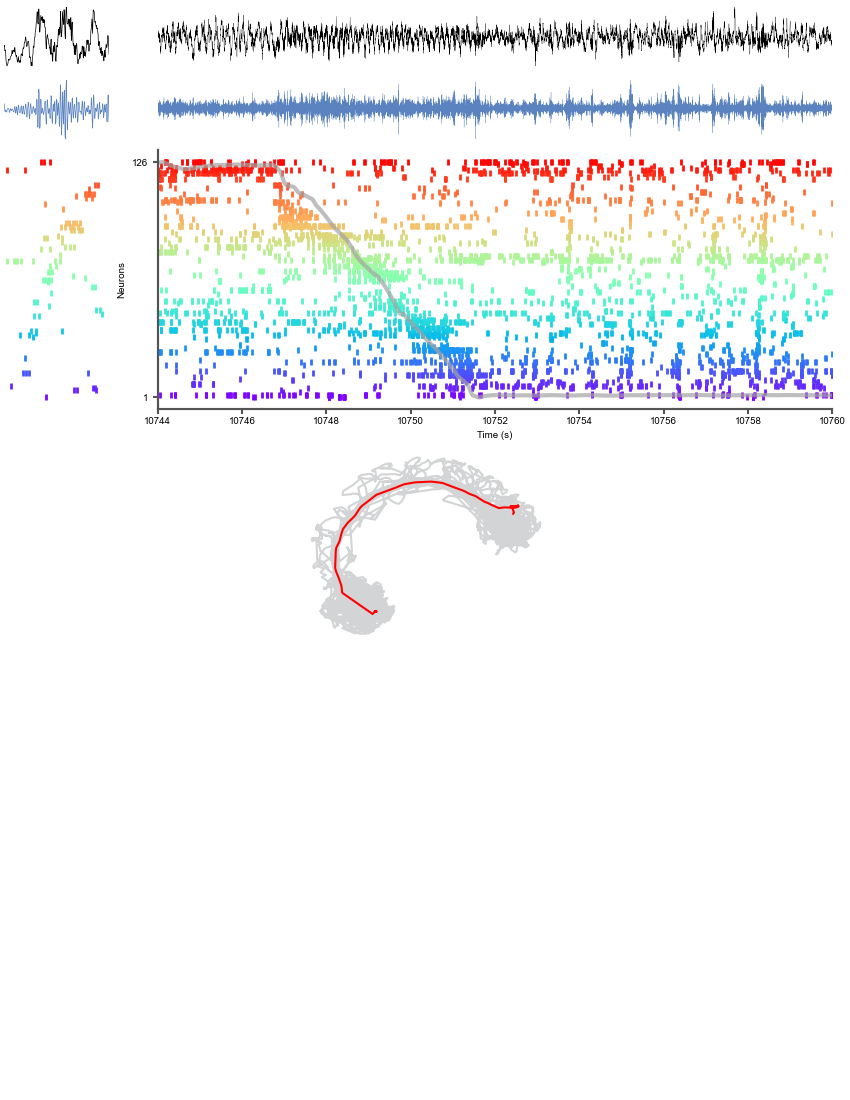

In [35]:
# ---- Choose Period-----
# RatVDay2SD
# run_epoch = [12721, 12]
# pbe = [12722.5, 12723]


# RatUDay2NSD
# run_epoch = [11419, 11430.5]
# pbe = [11420.22, 11420.5]
# run_epoch = [11162, 11172]
# pbe = [11165.5, 11165.79]
run_epoch = [10744, 10760]
# pbe = [10758.1, 10758.55]
pbe = [10753.61, 10753.87]

# RatVDay2SD
# run_epoch = [maze[0] + 1060, maze[0] + 1070]
# pbe = [maze[0] + 1060 + 4.5, maze[0] + 1060 + 4.7]

# run_epoch = maze+5
# pbe = [maze[0]+100,maze[0]+100.5]

neurons_sorted = sess.neurons[pf.get_sort_order("neuron_id")].time_slice(*run_epoch)
pos_epoch = maze_pos.time_slice(*run_epoch)

cmap = "rainbow"
raster_kw = dict(markersize=4, markeredgewidth=2)
fig = plotting.Fig(grid=(16, 6))

# ---- Running epoch --------

# Raw LFP
sig_ax = fig.subplot(fig.gs[0, 1:6])
signal = sess.eegfile.get_signal(85, *run_epoch)
sig_ax.plot(signal.time, signal.traces[0], "k", lw=0.2)
sig_ax.set_xlim(run_epoch)
sig_ax.axis("off")

# Ripple band LFP
rpl_signal = filter_sig.bandpass(signal, lf=125, hf=250)
rpl_ax = fig.subplot(fig.gs[1, 1:6], sharex=sig_ax)
rpl_ax.plot(signal.time, rpl_signal.traces[0], "#4a77bae8", lw=0.2)
rpl_ax.set_xlim(run_epoch)
rpl_ax.axis("off")


# Raster plot
ax = fig.subplot(fig.gs[2:6, 1:6], sharex=sig_ax)
plotting.plot_raster(neurons_sorted, color=cmap, ax=ax, **raster_kw)

# Position plot
ax2 = ax.twinx()
ax2.plot(pos_epoch.time, pos_epoch.x, color="#a3a3a3", alpha=0.7, lw=3)
ax2.set_yticks([])
xticks = np.arange(run_epoch[0], run_epoch[1], 5)
# ax.set_xticks(xticks, xticks - xticks[0])
ax.tick_params(rotation=0)
ax.set_yticks([1, len(neurons_sorted)])

replay_ax = fig.subplot(fig.gs[2:6, 0])
plotting.plot_raster(
    neurons_sorted.time_slice(*pbe), ax=replay_ax, color=cmap, **raster_kw
)
replay_ax.axis("off")

sig_ax = fig.subplot(fig.gs[0, 0], sharex=replay_ax)
pbe_signal = signal.time_slice(None, *pbe)
sig_ax.plot(pbe_signal.time, pbe_signal.traces[0], "k", lw=0.5)
sig_ax.axis("off")


rpl_ax = fig.subplot(fig.gs[1, 0], sharex=replay_ax)
replay_sig = rpl_signal.time_slice(None, *pbe)
rpl_ax.plot(
    replay_sig.time, rpl_signal.time_slice(None, *pbe).traces[0], "#4a77bae8", lw=0.5
)
# rpl_ax.set_xlim(run_epoch)
rpl_ax.axis("off")


# All position plot 

ax = fig.subplot(fig.gs[6:9,2:4])
allpos = sess.position.time_slice(*maze)
run_pos = sess.position.time_slice(*run_epoch)
ax.plot(allpos.x,allpos.y,color='#d3d4d5')
ax.plot(run_pos.x,run_pos.y,color='r')
ax.axis('off')



In [36]:
fig.savefig(subjects.figpath_sd/'example_run')

meta NOT subset; don't know how to subset; dropped


In [ ]:
_,ax = plt.subplots()

plotting.plot_ratemap(pf,normalize_tuning_curve=True,ax=ax)